In [203]:
# Initialize Otter
import otter
grader = otter.Notebook("project2.ipynb")

<table style="width: 100%;">
<tr style="background-color: transparent;">
<td width="100px"><img src="https://cs104williams.github.io/assets/cs104-logo.png" width="90px" style="text-align: center"/></td>
<td>
  <p style="margin-bottom: 0px; text-align: left; font-size: 18pt;"><strong>CSCI 104: Data Science and Computing for All</strong><br>
                Williams College<br>
                Fall 2024</p>
</td>
</tr>


# Final Project

Please see the [Final Project Description](https://www.cs.williams.edu/~cs104/docs/project2.html) for instructions and deadlines.

All work should appear in this notebook.  You may add as many additional cells as you like to each part.  Just click the `+` sign in this tab's toolbar to insert a new cell.  Then select "Markdown" from the toolbar's popup menu if you want the new cell to be for text, or "Code" if you want it to be for Python code.  Markdown cells can include basic formatting and are easily identified because they do not have the brackets `[ ]` in the left margin.  Click on any of our formatted text cells to see how to create lists, bold text, etc., or have a look [here](https://www.markdownguide.org/basic-syntax).


In [204]:
# Run this cell to set up the notebook.
# These lines import the numpy, datascience, and cs104 libraries.

import numpy as np
from datascience import *
from cs104 import *
%matplotlib inline

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 0. Source of data


Please tell us where you found the dataset(s) and what they include in general terms.
- Include URLs for where the data was downloaded. 
- What are the sources for the data? Are these reputable sources? 
- Can you find who (the names of humans) collected or cleaned the dataset before you downloaded it?

If you are having trouble getting started, here are a few places to look for data:
* [Google's Dataset Search](https://datasetsearch.research.google.com/)
* [Five-Thirty Eight](https://data.fivethirtyeight.com/)
* [Data Is Plural](https://docs.google.com/spreadsheets/d/1wZhPLMCHKJvwOkP4juclhjFgqIY8fQFMemwKL2c64vk/edit#gid=0)
* [Our World in Data](https://ourworldindata.org/)
* [How to Find and Work with Data: Data Sources](https://libguides.williams.edu/c.php?g=1331301&p=9804550) (curated by our Williams data literacy librarian, Regan Schwartz)

Dennis Kafura, Joung Min Choi, Bo Guan, computer scientists from Virginia Tech and UMass Amherst, are the authors of the opioids dataset on CORGIS-edu.github.io, with the opioid death data collected by The National Institute on Drug Abuse (NIDA). NIDA plays a leading role in the National Institutes of Health HEAL (Helping to End Addiction Long-term) Initiative, an effort to develop new scientific solutions to the overdose epidemic, including opioid and stimulant use disorders, and the crisis of chronic pain. Link: https://corgis-edu.github.io/corgis/csv/opioids/

The population data sets come from the StatsAmerica, an organization whose goal is to provide easy-to-use, actionable data for community use. The "Age and Sex Pop US" dataset was cleaned to highlight the population of the two sexes from 2000 to 2019. Similarly, the "Race Pop US" dataset was cleaned to show the spread of the population between different races. Link:https://www.statsamerica.org/downloads/default.aspx%5C#population PS the files are rather large (>10 MB).


<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 1. Quantitative questions


Pose at least two quantitative questions about the dataset. 

**Quantiative question 1:**

Are opioid death rates correlated with time and is this correlation consisitent across different identity groups (sex and race)?

**Quantitative question 2:**

Does opioid related death rate increase disporportionately between the racial stratifications from 2000 to 2019?

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 2. Data: Loading and Cleaning

Be sure to upload your csv files to the project on our server, and to clean your data if there are any missing values or other problems.  

We highly encourage you return to Lab 6 and revist how you cleaned data with `tbl.take_clean()`, `tbl.take_messy()`, and `tbl.replace()`. 

In [170]:
opioids_original = Table.read_table('opioids.csv')
opioids = opioids_original.drop('Number.All', 'Number.Opioid.Any','Number.Opioid.Prescription','Number.Opioid.Synthetic','Number.Opioid.Heroin','Number.Opioid.Cocaine','Rate.All.Race.Hispanic','Rate.Opioid.Any.Race.Hispanic','Rate.Opioid.Prescription.Race.Hispanic','Rate.Opioid.Synthetic.Race.Hispanic','Rate.Opioid.Heroin.Race.Hispanic','Rate.Opioid.Cocaine.Race.Hispanic')
opioids = opioids.where('Year', are.between_or_equal_to(2000,2019))
opioids.show(21)

Year,Rate.All.Total,Rate.All.Sex.Female,Rate.All.Sex.Male,Rate.All.Race.White,Rate.All.Race.Black,Rate.All.Race.Asian or Pacific Islander,Rate.All.Race.American Indian or Alaska Native,Rate.Opioid.Any.Total,Rate.Opioid.Any.Sex.Female,Rate.Opioid.Any.Sex.Male,Rate.Opioid.Any.Race.White,Rate.Opioid.Any.Race.Black,Rate.Opioid.Any.Race.Asian or Pacific Islander,Rate.Opioid.Any.Race.American Indian or Alaska Native,Rate.Opioid.Prescription.Total,Rate.Opioid.Prescription.Sex.Female,Rate.Opioid.Prescription.Sex.Male,Rate.Opioid.Prescription.Race.White,Rate.Opioid.Prescription.Race.Black,Rate.Opioid.Prescription.Race.American Indian or Alaska Native,Rate.Opioid.Synthetic.Total,Rate.Opioid.Synthetic.Sex.Female,Rate.Opioid.Synthetic.Sex.Male,Rate.Opioid.Synthetic.Race.White,Rate.Opioid.Synthetic.Race.Black,Rate.Opioid.Heroin.Total,Rate.Opioid.Heroin.Sex.Female,Rate.Opioid.Heroin.Sex.Male,Rate.Opioid.Heroin.Race.White,Rate.Opioid.Heroin.Race.Black,Rate.Opioid.Cocaine.Total,Rate.Opioid.Cocaine.Sex.Female,Rate.Opioid.Cocaine.Sex.Male,Rate.Opioid.Cocaine.Race.White,Rate.Opioid.Cocaine.Race.Black,Rate.Opioid.Cocaine.Race.American Indian or Alaska Native
2000,6.2,4.1,8.3,6.6,7.3,1,5.5,3,1.6,4.4,3.1,3.5,0.3,2.7,1.3,0.9,1.8,1.6,0.8,1.3,0.3,0.3,0.3,0.3,0.1,0.7,0.2,1.1,0.6,0.9,1.3,0.6,1.9,1,3.3,1
2001,6.8,4.6,9,7.4,7.6,1.2,6.9,3.3,1.9,4.8,3.7,3.3,0.3,3.5,1.7,1.1,2.2,2,0.9,2,0.3,0.3,0.4,0.4,0.2,0.6,0.2,1,0.6,0.8,1.3,0.7,2,1,3.6,1
2002,8.2,5.8,10.6,9.2,8.2,1.4,8.5,4.1,2.6,5.7,4.7,3.6,0.5,4.1,2.3,1.6,2.9,2.8,1.2,2.6,0.4,0.4,0.5,0.6,0.2,0.7,0.2,1.2,0.7,0.9,1.6,0.8,2.4,1.3,4,1.1
2003,8.9,6.4,11.5,10.2,8.2,1.4,10.8,4.5,2.8,6.1,5.2,3.5,0.3,5.3,2.6,1.8,3.3,3.2,1.1,3.3,0.5,0.4,0.5,0.6,0.1,0.7,0.2,1.2,0.7,0.8,1.8,0.9,2.7,1.6,4.1,1.7
2004,9.4,6.9,11.8,11,8.3,1.5,12.5,4.7,3.1,6.3,5.7,3.2,0.4,6.2,2.9,2.1,3.7,3.7,1.4,4.2,0.6,0.5,0.6,0.7,0.2,0.6,0.2,1.1,0.7,0.6,1.9,1,2.8,1.7,4.3,1.6
2005,10.1,7.3,12.8,11.8,9.3,1.7,13.1,5.1,3.4,6.6,6.2,3.4,0.6,6.9,3.2,2.4,4.1,4.1,1.6,4.7,0.6,0.5,0.6,0.8,0.2,0.7,0.3,1.1,0.7,0.8,2.1,1.1,3.1,1.9,4.9,2.3
2006,11.5,8.2,14.8,13.6,10.8,1.8,14.1,5.9,3.9,7.8,7.3,4.2,0.5,7.1,3.9,2.8,4.9,5,1.8,4.7,0.9,0.7,1.1,1.1,1,0.7,0.2,1.2,0.8,0.7,2.5,1.3,3.8,2.3,5.6,1.6
2007,11.9,8.8,14.9,14.5,9.7,1.8,14.2,6.1,4.3,8,7.8,3.6,0.5,7.8,4.2,3.2,5.3,5.6,1.8,5.2,0.7,0.7,0.8,1,0.2,0.8,0.3,1.3,0.9,0.8,2.2,1.1,3.2,2,4.7,2.1
2008,11.9,8.9,14.9,14.8,8.4,1.7,15.8,6.4,4.4,8.4,8.2,3.4,0.6,9.3,4.3,3.2,5.4,5.7,1.8,6.1,0.8,0.7,0.8,1,0.2,1,0.4,1.6,1.2,0.8,1.7,0.9,2.5,1.6,3.4,1.5
2009,11.9,9.1,14.8,15,8.3,1.9,17.7,6.6,4.6,8.7,8.6,3.6,0.6,11.3,4.4,3.3,5.5,5.8,1.9,7.8,1,0.9,1,1.2,0.3,1.1,0.4,1.8,1.3,0.9,1.4,0.7,2.1,1.3,3.2,1.8


The opioids table shows the number of deaths (integer) for a given subcategory of opioid type and year, as well as the death rate per 100,000 people across different racial categories and sexes for each of the opioid subtypes. "All" refers to all drug overdoses, whereas "Any" refers to any opioid. Some data is missing however, with  Synthetic and Heroin not including Asian/PI or Native and Prescription not including Asian/PI. Data including the word 'Hispanic' was not included as it is an ethnic designation rather than a racial one. These rates can be used to calculate the number of deaths that occured by doing (rate/100,000) * population for any of the identifiers.

In [4]:
pop_of_sex = Table.read_table('Age and Sex Pop US.csv')
pop_of_sex = pop_of_sex.where('Description', 'U.S.').select('Year', 'Total Population', 'Male Population', 'Female Population')
pop_of_sex = pop_of_sex.set_format('Total Population', NumberFormatter).set_format('Male Population', NumberFormatter).set_format('Female Population', NumberFormatter).relabeled('Total Population', 'Total Pop').relabeled('Male Population', 'Male Pop').relabeled('Female Population', 'Female Pop')
pop_of_sex.show(20)

Year,Total Pop,Male Pop,Female Pop
2000,"282,162,411.00","138,443,407.00","143,719,004.00"
2001,"284,968,955.00","139,891,492.00","145,077,463.00"
2002,"287,625,193.00","141,230,559.00","146,394,634.00"
2003,"290,107,933.00","142,428,897.00","147,679,036.00"
2004,"292,805,298.00","143,828,012.00","148,977,286.00"
2005,"295,516,599.00","145,197,078.00","150,319,521.00"
2006,"298,379,912.00","146,647,265.00","151,732,647.00"
2007,"301,231,207.00","148,064,854.00","153,166,353.00"
2008,"304,093,966.00","149,489,951.00","154,604,015.00"
2009,"306,771,529.00","150,807,454.00","155,964,075.00"


The population of sex table shows the total US population split between males and females.

In [5]:
pop_of_race = Table.read_table('Race Pop US.csv')
pop_of_race = pop_of_race.where('Description', 'U.S.').where('Year', are.between_or_equal_to(2000,2019)).drop('IBRC_Geo_ID', 'Statefips', 'Countyfips', 'Description', 'Not Hispanic','Hispanic')
pop_of_race = pop_of_race.set_format('White Alone',NumberFormatter).set_format('Black Alone', NumberFormatter).set_format('American Indian or Alaskan Native', NumberFormatter).set_format('Asian Alone', NumberFormatter).set_format('Hawaiian or Pacific Islander Alone', NumberFormatter).set_format('Total Population',NumberFormatter).set_format('Two or More Races',NumberFormatter)
pop_of_race = pop_of_race.relabeled('American Indian or Alaskan Native', 'Native Pop').relabeled('Hawaiian or Pacific Islander Alone', 'Pacific Islander Pop').relabeled('Black Alone', 'Black Pop').relabeled('White Alone', 'White Pop').relabeled('Asian Alone', 'Asian Pop').relabeled('Total Population', 'Total Pop')
asian_or_PI = pop_of_race.column('Asian Pop') + pop_of_race.column('Pacific Islander Pop')
pop_of_race = pop_of_race.with_column('Asian or PI Pop', asian_or_PI).drop('Pacific Islander Pop','Asian Pop').set_format('Asian or PI Pop', NumberFormatter).set_format('Two or More Races', NumberFormatter)
pop_of_race.show(21)

Year,Total Pop,White Pop,Black Pop,Native Pop,Two or More Races,Asian or PI Pop
2000,"282,162,411.00","228,530,479.00","35,814,706.00","2,684,491.00","3,959,557.00","11,173,178.00"
2001,"284,968,955.00","230,049,196.00","36,263,029.00","2,769,731.00","4,217,119.00","11,669,880.00"
2002,"287,625,193.00","231,446,915.00","36,684,650.00","2,857,113.00","4,479,985.00","12,156,530.00"
2003,"290,107,933.00","232,717,191.00","37,066,096.00","2,947,575.00","4,751,156.00","12,625,915.00"
2004,"292,805,298.00","234,120,447.00","37,510,582.00","3,044,517.00","5,039,695.00","13,090,057.00"
2005,"295,516,599.00","235,491,577.00","37,961,688.00","3,147,772.00","5,339,095.00","13,576,467.00"
2006,"298,379,912.00","236,954,818.00","38,443,048.00","3,258,666.00","5,656,695.00","14,066,685.00"
2007,"301,231,207.00","238,378,087.00","38,935,533.00","3,377,213.00","5,992,680.00","14,547,694.00"
2008,"304,093,966.00","239,783,014.00","39,429,414.00","3,504,878.00","6,345,687.00","15,030,973.00"
2009,"306,771,529.00","241,034,399.00","39,902,270.00","3,636,766.00","6,706,378.00","15,491,716.00"


The population of race table shows the total US population and how it is split up between Black, White, Asian/PI, and Native people. Total population is the sum of all other columns except Hispanic. Hispanic and not hispanic designations were dropped from the data so that the total remains accurate of the data displayed. Asian and Pacific Islander were combind as they are in the opioids dataset.

In [6]:
opioids_and_pop = pop_of_sex.join('Year', pop_of_race).join('Year', opioids)
opioids_and_pop.drop('Total Pop_2').show(21)

Year,Total Pop,Male Pop,Female Pop,White Pop,Black Pop,Native Pop,Two or More Races,Asian or PI Pop,Rate.All.Total,Rate.All.Sex.Female,Rate.All.Sex.Male,Rate.All.Race.White,Rate.All.Race.Black,Rate.All.Race.Asian or Pacific Islander,Rate.All.Race.American Indian or Alaska Native,Rate.Opioid.Any.Total,Rate.Opioid.Any.Sex.Female,Rate.Opioid.Any.Sex.Male,Rate.Opioid.Any.Race.White,Rate.Opioid.Any.Race.Black,Rate.Opioid.Any.Race.Asian or Pacific Islander,Rate.Opioid.Any.Race.American Indian or Alaska Native,Rate.Opioid.Prescription.Total,Rate.Opioid.Prescription.Sex.Female,Rate.Opioid.Prescription.Sex.Male,Rate.Opioid.Prescription.Race.White,Rate.Opioid.Prescription.Race.Black,Rate.Opioid.Prescription.Race.American Indian or Alaska Native,Rate.Opioid.Synthetic.Total,Rate.Opioid.Synthetic.Sex.Female,Rate.Opioid.Synthetic.Sex.Male,Rate.Opioid.Synthetic.Race.White,Rate.Opioid.Synthetic.Race.Black,Rate.Opioid.Heroin.Total,Rate.Opioid.Heroin.Sex.Female,Rate.Opioid.Heroin.Sex.Male,Rate.Opioid.Heroin.Race.White,Rate.Opioid.Heroin.Race.Black,Rate.Opioid.Cocaine.Total,Rate.Opioid.Cocaine.Sex.Female,Rate.Opioid.Cocaine.Sex.Male,Rate.Opioid.Cocaine.Race.White,Rate.Opioid.Cocaine.Race.Black,Rate.Opioid.Cocaine.Race.American Indian or Alaska Native
2000,"282,162,411.00","138,443,407.00","143,719,004.00","228,530,479.00","35,814,706.00","2,684,491.00","3,959,557.00","11,173,178.00",6.2,4.1,8.3,6.6,7.3,1,5.5,3,1.6,4.4,3.1,3.5,0.3,2.7,1.3,0.9,1.8,1.6,0.8,1.3,0.3,0.3,0.3,0.3,0.1,0.7,0.2,1.1,0.6,0.9,1.3,0.6,1.9,1,3.3,1
2001,"284,968,955.00","139,891,492.00","145,077,463.00","230,049,196.00","36,263,029.00","2,769,731.00","4,217,119.00","11,669,880.00",6.8,4.6,9,7.4,7.6,1.2,6.9,3.3,1.9,4.8,3.7,3.3,0.3,3.5,1.7,1.1,2.2,2,0.9,2,0.3,0.3,0.4,0.4,0.2,0.6,0.2,1,0.6,0.8,1.3,0.7,2,1,3.6,1
2002,"287,625,193.00","141,230,559.00","146,394,634.00","231,446,915.00","36,684,650.00","2,857,113.00","4,479,985.00","12,156,530.00",8.2,5.8,10.6,9.2,8.2,1.4,8.5,4.1,2.6,5.7,4.7,3.6,0.5,4.1,2.3,1.6,2.9,2.8,1.2,2.6,0.4,0.4,0.5,0.6,0.2,0.7,0.2,1.2,0.7,0.9,1.6,0.8,2.4,1.3,4,1.1
2003,"290,107,933.00","142,428,897.00","147,679,036.00","232,717,191.00","37,066,096.00","2,947,575.00","4,751,156.00","12,625,915.00",8.9,6.4,11.5,10.2,8.2,1.4,10.8,4.5,2.8,6.1,5.2,3.5,0.3,5.3,2.6,1.8,3.3,3.2,1.1,3.3,0.5,0.4,0.5,0.6,0.1,0.7,0.2,1.2,0.7,0.8,1.8,0.9,2.7,1.6,4.1,1.7
2004,"292,805,298.00","143,828,012.00","148,977,286.00","234,120,447.00","37,510,582.00","3,044,517.00","5,039,695.00","13,090,057.00",9.4,6.9,11.8,11,8.3,1.5,12.5,4.7,3.1,6.3,5.7,3.2,0.4,6.2,2.9,2.1,3.7,3.7,1.4,4.2,0.6,0.5,0.6,0.7,0.2,0.6,0.2,1.1,0.7,0.6,1.9,1,2.8,1.7,4.3,1.6
2005,"295,516,599.00","145,197,078.00","150,319,521.00","235,491,577.00","37,961,688.00","3,147,772.00","5,339,095.00","13,576,467.00",10.1,7.3,12.8,11.8,9.3,1.7,13.1,5.1,3.4,6.6,6.2,3.4,0.6,6.9,3.2,2.4,4.1,4.1,1.6,4.7,0.6,0.5,0.6,0.8,0.2,0.7,0.3,1.1,0.7,0.8,2.1,1.1,3.1,1.9,4.9,2.3
2006,"298,379,912.00","146,647,265.00","151,732,647.00","236,954,818.00","38,443,048.00","3,258,666.00","5,656,695.00","14,066,685.00",11.5,8.2,14.8,13.6,10.8,1.8,14.1,5.9,3.9,7.8,7.3,4.2,0.5,7.1,3.9,2.8,4.9,5,1.8,4.7,0.9,0.7,1.1,1.1,1,0.7,0.2,1.2,0.8,0.7,2.5,1.3,3.8,2.3,5.6,1.6
2007,"301,231,207.00","148,064,854.00","153,166,353.00","238,378,087.00","38,935,533.00","3,377,213.00","5,992,680.00","14,547,694.00",11.9,8.8,14.9,14.5,9.7,1.8,14.2,6.1,4.3,8,7.8,3.6,0.5,7.8,4.2,3.2,5.3,5.6,1.8,5.2,0.7,0.7,0.8,1,0.2,0.8,0.3,1.3,0.9,0.8,2.2,1.1,3.2,2,4.7,2.1
2008,"304,093,966.00","149,489,951.00","154,604,015.00","239,783,014.00","39,429,414.00","3,504,878.00","6,345,687.00","15,030,973.00",11.9,8.9,14.9,14.8,8.4,1.7,15.8,6.4,4.4,8.4,8.2,3.4,0.6,9.3,4.3,3.2,5.4,5.7,1.8,6.1,0.8,0.7,0.8,1,0.2,1,0.4,1.6,1.2,0.8,1.7,0.9,2.5,1.6,3.4,1.5
2009,"306,771,529.00","150,807,454.00","155,964,075.00","241,034,399.00","39,902,270.00","3,636,766.00","6,706,378.00","15,491,716.00",11.9,9.1,14.8,15,8.3,1.9,17.7,6.6,4.6,8.7,8.6,3.6,0.6,11.3,4.4,3.3,5.5,5.8,1.9,7.8,1,0.9,1,1.2,0.3,1.1,0.4,1.8,1.3,0.9,1

The opioids and population table is a combination of the three prior tables, with raw populations for multiple differen sexes and races and opioid and other drug related death rates across similar categories.

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 3. Descriptive statistics


Use code and text to provide at least three descriptions of the dataset (e.g., number of rows, mean of one of the columns).

In [183]:
num_columns = opioids_and_pop.num_columns
num_rows = opioids_and_pop.num_rows
print("The opioids table has", num_rows, "rows and", num_columns, "columns.")

The opioids table has 20 rows and 46 columns.


Opioid death rate has been increasing rapidly since 2000


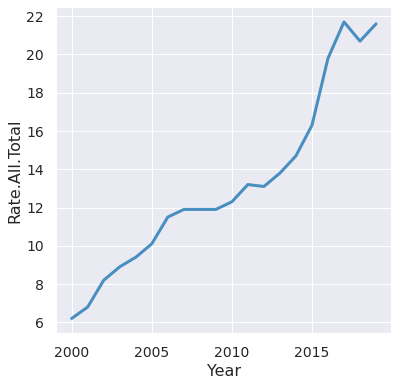

In [184]:
opioids_and_pop.plot('Year', 'Rate.All.Total')
print("Opioid death rate has been increasing rapidly since 2000")

In [10]:
total_drug_deaths = (opioids_and_pop.column('Rate.All.Total')/100000)*opioids_and_pop.column('Total Pop')
total_opioid_deaths = (opioids_and_pop.column('Rate.Opioid.Any.Total')/100000)*opioids_and_pop.column('Total Pop')
print("Approximately",round(sum(total_drug_deaths)), "people died of drugs overdose overdose from 2000 to 2019. Of this,", round(sum(total_opioid_deaths)),"were due to opioid drugs; ~", round((sum(total_opioid_deaths)/sum(total_drug_deaths))*100), "percent of all deaths.")

Approximately 822434 people died of drugs overdose overdose from 2000 to 2019. Of this, 491143 were due to opioid drugs; ~ 60 percent of all deaths.


There have been marked changes in death rate depending on opioid type since 2000.


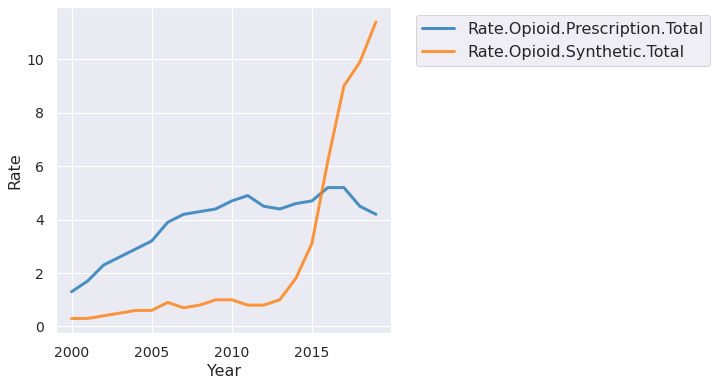

In [187]:
synth_vs_prescription = opioids_and_pop.select('Year','Rate.Opioid.Prescription.Total','Rate.Opioid.Synthetic.Total')
synth_vs_prescription.plot('Year').set_ylabel('Rate')
print("There have been marked changes in death rate depending on opioid type since 2000.")

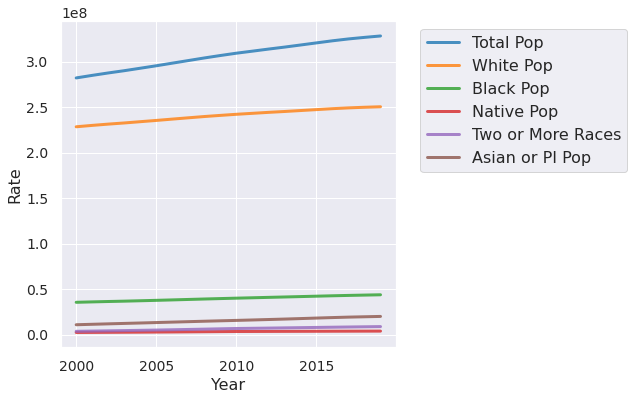

In [188]:
pop_of_race.plot('Year').set_ylabel('Rate')

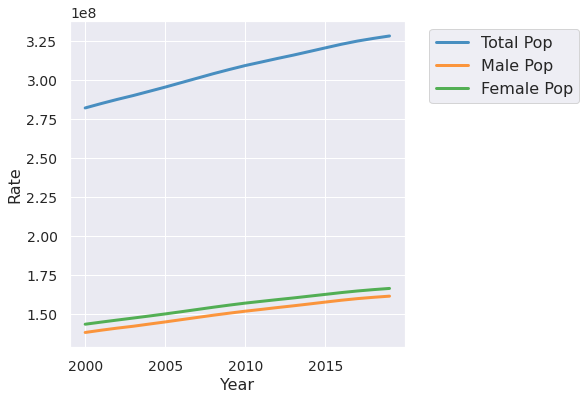

In [189]:
pop_of_sex.plot('Year').set_ylabel('Rate')

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 4. Data wrangling


Use at least two Table methods (e.g., `sort`, `where`, `take`, `apply`, `pivot`, `join`, `group`) to do something meaningful with the data. Describes (in full English sentences) what those Table methods are doing.

The majority of the data wrangling was performed in section 2 where data was cleaned and the three large tables were joined together to create the final opioids_and_pop table.

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 5. Visualizations


Create at least two visualizations of the dataset (e.g., a scatter and line plot, or two histograms). Describs (using full English sentences) any interesting findings from the visualizations.

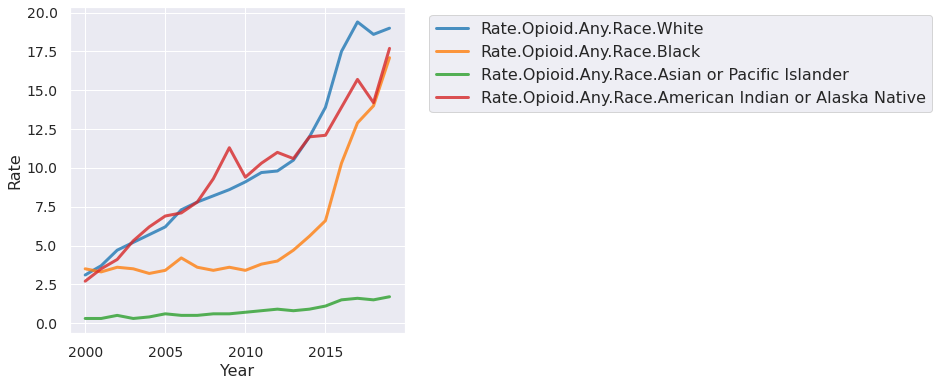

In [190]:
opioids_race = opioids.select('Year', 'Rate.Opioid.Any.Race.White', 'Rate.Opioid.Any.Race.Black','Rate.Opioid.Any.Race.Asian or Pacific Islander','Rate.Opioid.Any.Race.American Indian or Alaska Native')
opioids_race.plot('Year').set_ylabel('Rate')

Death rates due to any type of opioid have consistently increased across all racial categories since 2000.

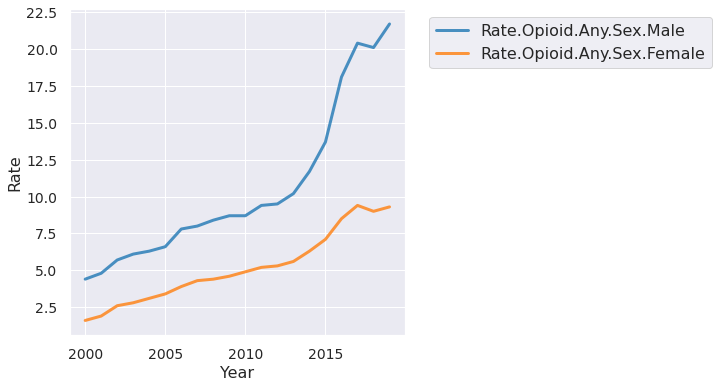

In [191]:
opioids_sex = opioids.select('Year', 'Rate.Opioid.Any.Sex.Male', 'Rate.Opioid.Any.Sex.Female')
opioids_sex.plot('Year').set_ylabel('Rate')

Death rates due to any type of opioid have increased across both sexes since 2000.

In [25]:
opioids_drugs_array = make_array("Prescription", "Synthetic", "Heroin", "Cocaine")
opioids_rate_all_2010 = opioids_and_pop.take(11).select("Year", "Rate.Opioid.Prescription.Total", "Rate.Opioid.Synthetic.Total", "Rate.Opioid.Heroin.Total", "Rate.Opioid.Cocaine.Total").stack("Year").drop("Year","column").column("value")
opioids_rate_black_2010 = opioids.take(11).select("Year", "Rate.Opioid.Prescription.Race.Black", "Rate.Opioid.Synthetic.Race.Black", "Rate.Opioid.Heroin.Race.Black", "Rate.Opioid.Cocaine.Race.Black").stack("Year").drop("Year","column").column("value")
opioids_rate_white_2010 = opioids.take(11).select("Year", "Rate.Opioid.Prescription.Race.White", "Rate.Opioid.Synthetic.Race.White", "Rate.Opioid.Heroin.Race.White", "Rate.Opioid.Cocaine.Race.White").stack("Year").drop("Year","column").column("value")


opioids_black_and_white_2010 = Table().with_columns("Opioid Drug Type", opioids_drugs_array, "Opioid Black Rate", opioids_rate_black_2010/sum(opioids_rate_black_2010), "Opioid White Rate", opioids_rate_white_2010/sum(opioids_rate_white_2010), "Opioid Total Rate", opioids_rate_all_2010/sum(opioids_rate_all_2010))
opioids_black_and_white_2010

Opioid Drug Type,Opioid Black Rate,Opioid White Rate,Opioid Total Rate
Prescription,0.3125,0.6,0.569767
Synthetic,0.046875,0.109091,0.0930233
Heroin,0.15625,0.163636,0.162791
Cocaine,0.484375,0.127273,0.174419


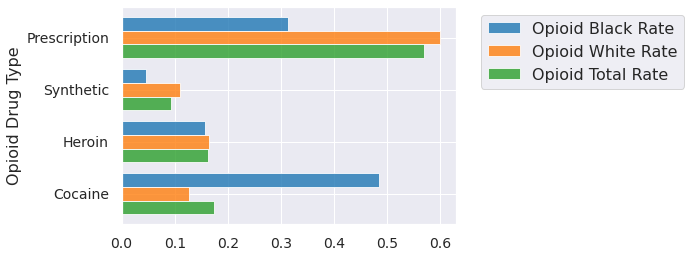

In [26]:
opioids_black_and_white_2010.barh("Opioid Drug Type")

There are clear differences between the rate of opioid deaths for black and white populations, and their representation in the whole population. 

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 6. Statistical Inference

Correctly complete at least two statistical inference procedures (e.g., a hypothesis test and a bootstrap confidence interval; or two association). Discuss (in full English sentences) the implications of the statistical inference procedures.

Categories: 
- Hypothesis tests
- Estimation (e.g., confidence intervals via bootstrapping) 
- Association (e.g., correlation or a linear regression line fit from a scatter plot) 

<h3><b>Correlation and Linear Regression</b></h3>

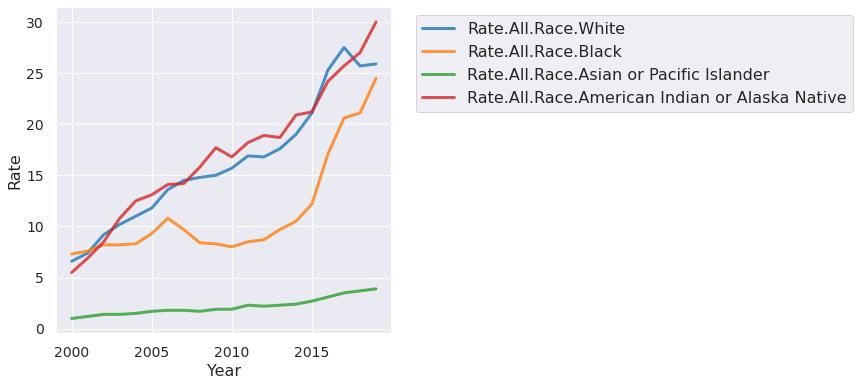

In [192]:
rate_all = opioids_and_pop.select('Year','Rate.All.Race.White', 'Rate.All.Race.Black', 'Rate.All.Race.Asian or Pacific Islander', 'Rate.All.Race.American Indian or Alaska Native')
rate_all.plot('Year').set_ylabel('Rate')

In [69]:
a = round(pearson_correlation(opioids_and_pop, 'Year', 'Rate.All.Race.White'),3)
b = round(pearson_correlation(opioids_and_pop, 'Year', 'Rate.All.Race.Black'),3)
c = round(pearson_correlation(opioids_and_pop, 'Year', 'Rate.All.Race.Asian or Pacific Islander'),3)
d = round(pearson_correlation(opioids_and_pop, 'Year', 'Rate.All.Race.American Indian or Alaska Native'),3)
print("Year has a strong positive correlation with drug overdoses as shown by the correlation coefficients", a, b, c, d)

Year has a strong positive correlation with drug overdoses as shown by the correlation coefficients 0.975 0.778 0.952 0.984


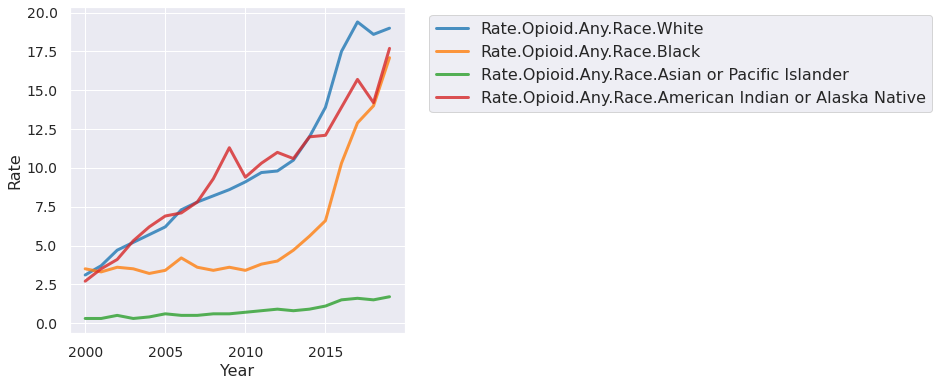

In [186]:
rate_opioid_any = opioids_and_pop.select('Year','Rate.Opioid.Any.Race.White', 'Rate.Opioid.Any.Race.Black', 'Rate.Opioid.Any.Race.Asian or Pacific Islander', 'Rate.Opioid.Any.Race.American Indian or Alaska Native')
rate_opioid_any.plot('Year').set_ylabel('Rate')

In [80]:
e = round(pearson_correlation(opioids_and_pop, 'Year', 'Rate.Opioid.Any.Race.White'),3)
f = round(pearson_correlation(opioids_and_pop, 'Year', 'Rate.Opioid.Any.Race.Black'),3)
g = round(pearson_correlation(opioids_and_pop, 'Year', 'Rate.Opioid.Any.Race.Asian or Pacific Islander'),3)
h = round(pearson_correlation(opioids_and_pop, 'Year', 'Rate.Opioid.Any.Race.American Indian or Alaska Native'),3)
print("Year has a strong positive correlation with opioid-related drug overdoses as shown by the correlation coefficients", e, f, g, h)

Year has a strong positive correlation with opioid-related drug overdoses as shown by the correlation coefficients 0.959 0.778 0.932 0.977


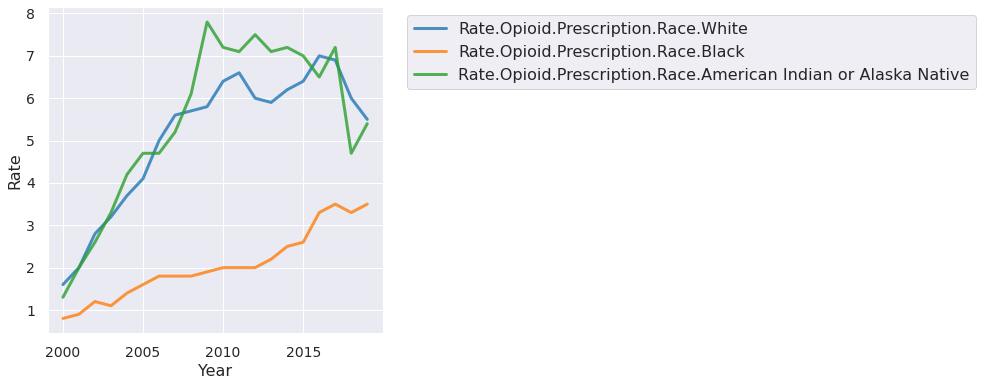

In [193]:
rate_opioid_presc = opioids_and_pop.select('Year','Rate.Opioid.Prescription.Race.White', 'Rate.Opioid.Prescription.Race.Black','Rate.Opioid.Prescription.Race.American Indian or Alaska Native')
rate_opioid_presc.plot('Year').set_ylabel('Rate')

In [76]:
k = round(pearson_correlation(opioids_and_pop, 'Year', 'Rate.Opioid.Prescription.Race.White'),3)
l = round(pearson_correlation(opioids_and_pop, 'Year', 'Rate.Opioid.Prescription.Race.Black'),3)
m = round(pearson_correlation(opioids_and_pop, 'Year', 'Rate.Opioid.Prescription.Race.American Indian or Alaska Native'),3)
print("Year has a strong positive correlation with prescription opioid-related drug overdoses as shown by the correlation coefficients", k, l, m)

Year has a strong positive correlation with prescription opioid-related drug overdoses as shown by the correlation coefficients 0.851 0.966 0.72


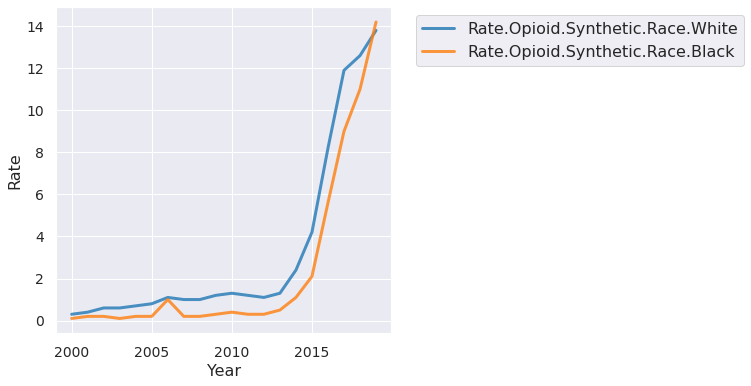

In [194]:
rate_opioid_synth = opioids_and_pop.select('Year','Rate.Opioid.Synthetic.Race.White', 'Rate.Opioid.Synthetic.Race.Black')
rate_opioid_synth.plot('Year').set_ylabel('Rate')

In [78]:
i = round(pearson_correlation(opioids_and_pop, 'Year', 'Rate.Opioid.Synthetic.Race.White'),3)
j = round(pearson_correlation(opioids_and_pop, 'Year', 'Rate.Opioid.Synthetic.Race.Black'),3)
print("Year has a strong positive correlation with synthetic opioid-related drug overdoses as shown by the correlation coefficients", i, j)

Year has a strong positive correlation with synthetic opioid-related drug overdoses as shown by the correlation coefficients 0.785 0.726


Year is correlated with synthetic opioid-related drug overdoses as shown by the correlation coefficients above, but there is an interesting inflection point around 2012 that we will investigate further.

<b>Death rates from synthetic opioids in the black population before and after 2012<b>

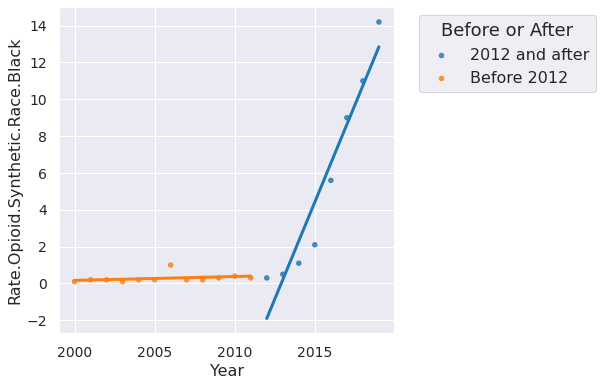

In [107]:
before_and_after_2012 = opioids_and_pop.select('Year', 'Rate.Opioid.Synthetic.Race.Black')
before_or_after_2012 = make_array('Before 2012', 'Before 2012', 'Before 2012', 'Before 2012', 'Before 2012', 'Before 2012', 'Before 2012', 'Before 2012', 'Before 2012', 'Before 2012', 'Before 2012', 'Before 2012', '2012 and after', '2012 and after', '2012 and after', '2012 and after', '2012 and after', '2012 and after', '2012 and after', '2012 and after')
before_and_after_2012 = before_and_after_2012.with_column('Before or After', before_or_after_2012)
plot_synthetic_black = before_and_after_2012.scatter('Year', 'Rate.Opioid.Synthetic.Race.Black', group='Before or After', fit_line=True)

Before 2012: 0.3144106002595909
After 2012: 0.962837972007623


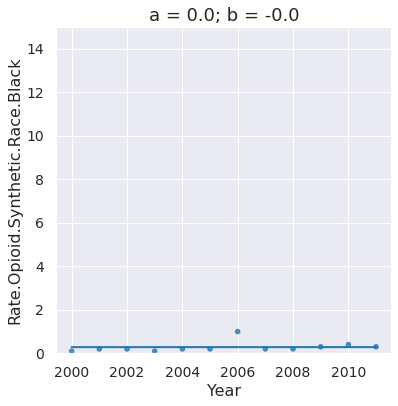

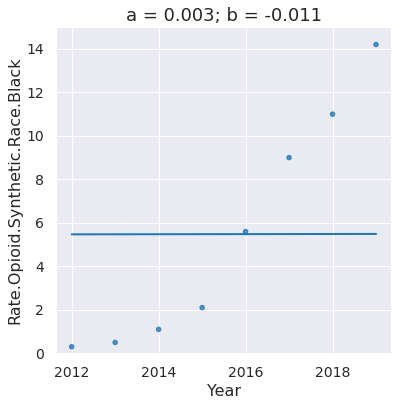

In [118]:
synth_opioids_before_2012 = opioids_and_pop.where('Year', are.below(2012)).select('Year', 'Rate.Opioid.Synthetic.Race.White', 'Rate.Opioid.Synthetic.Race.Black')
synth_opioids_2012_and_after = opioids_and_pop.where('Year', are.above_or_equal_to(2012)).select('Year', 'Rate.Opioid.Synthetic.Race.White', 'Rate.Opioid.Synthetic.Race.Black')
a,b = linear_regression(synth_opioids_before_2012, 'Year', 'Rate.Opioid.Synthetic.Race.Black')
c,d = linear_regression(synth_opioids_2012_and_after, 'Year', 'Rate.Opioid.Synthetic.Race.Black')
reg_before_2012 = plot_scatter_with_line(synth_opioids_before_2012, 'Year', 'Rate.Opioid.Synthetic.Race.Black', a, b)
reg_after_2012 = plot_scatter_with_line(synth_opioids_2012_and_after, 'Year', 'Rate.Opioid.Synthetic.Race.Black', c, d)
reg_before_2012.set_ylim(make_array(0,15))
reg_after_2012.set_ylim(make_array(0,15))
print("Before 2012:",pearson_correlation(synth_opioids_before_2012, 'Year', 'Rate.Opioid.Synthetic.Race.Black'))
print("After 2012:",pearson_correlation(synth_opioids_2012_and_after, 'Year', 'Rate.Opioid.Synthetic.Race.Black'))

<b>Conclusion:</b><br>
The results of our regressions demonstrate that death rates for all types of opioid drugs have been increasing from 2000 to 2019. Our secondary analysis of how death rate is changing over time in the black community highlights the fact that different opioid drugs play more or less of a role in the overall overdose rate and this changes over time as well. The death rate due to synthetic opioids like fentanyl in the black community has drastically changed over the timeline of this data set.

<h3><b>Hypothesis Test</b></h3>

In [31]:
opioids_drugs_array = make_array("Prescription", "Synthetic", "Heroin", "Cocaine")
opioids_rate_all_2010 = opioids_and_pop.take(10).select("Year", "Rate.Opioid.Prescription.Total", "Rate.Opioid.Synthetic.Total", "Rate.Opioid.Heroin.Total", "Rate.Opioid.Cocaine.Total").stack("Year").drop("Year","column").column("value")
opioids_rate_black_2010 = opioids_and_pop.take(10).select("Year", "Rate.Opioid.Prescription.Race.Black", "Rate.Opioid.Synthetic.Race.Black", "Rate.Opioid.Heroin.Race.Black", "Rate.Opioid.Cocaine.Race.Black").stack("Year").drop("Year","column").column("value")

opioids_black_2010 = Table().with_columns("Opioid Drug Type", opioids_drugs_array, "Opioid Black Rate", opioids_rate_black_2010/sum(opioids_rate_black_2010), "Opioid Total Rate", opioids_rate_all_2010/sum(opioids_rate_all_2010))
opioids_black_2010

Opioid Drug Type,Opioid Black Rate,Opioid Total Rate
Prescription,0.31746,0.5875
Synthetic,0.0634921,0.125
Heroin,0.126984,0.125
Cocaine,0.492063,0.1625


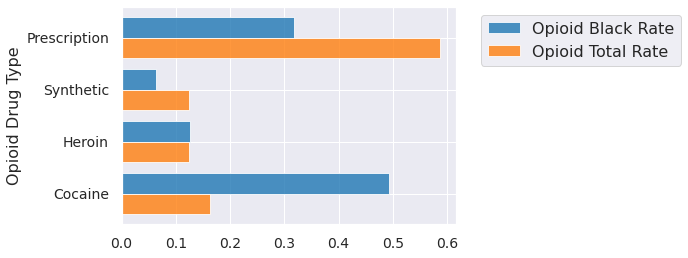

In [32]:
opioids_black_2010.barh("Opioid Drug Type")

We observe a difference between the two distributions in the bar chart: The death rates caused by Heroin and Cocaine in the black population is disproportionate to the total opioid death rates of the entire population in the year 2010.<br><br>
We wish to investigate whether these disproportionate deaths is just due to random chance or to other factors.
<br><br>
<b>Null Hypothesis:</b> The disproportionate deaths are just due to random chance.<br>
<br>
<b>Alternative Hypothesis:</b> The disproportionate deaths are due to other factors such as lack of treatment options.<br>
<br>
<b>Test Statistic:</b> Total Variation Distance (TVD)

In [33]:
def tvd(distribution1, distribution2):
    return sum(np.abs(distribution1 - distribution2))/2

observed_opioid_test_statistic = tvd(opioids_black_2010.column("Opioid Black Rate"), opioids_black_2010.column("Opioid Total Rate"))
observed_opioid_test_statistic

0.33154761904761904

In [34]:
def sample_opioids_proportions(sample_size):
    opioids_total_array = opioids_black_2010.column("Opioid Total Rate")
    return sample_proportions(sample_size, opioids_total_array)

In [44]:
sampled_opioids = sample_opioids_proportions(1000)
sampled_opioids

array([0.549, 0.123, 0.143, 0.185])

In [51]:
def opioids_tvd_statistic(sample):
    """
    Returns the total variation distance between the sample and the population
    """
    return tvd(sample, opioids_black_2010.column("Opioid Total Rate"))

In [52]:
sample = sample_opioids_proportions(10000)
opioids_tvd_statistic(sample)

0.009200000000000014

In [53]:
sample_size = 50
num_trials = 10000
simulated_opioids_statistics = simulate_sample_statistic(sample_opioids_proportions, sample_size, opioids_tvd_statistic, num_trials)
simulated_opioids_statistics

array([0.0725, 0.1925, 0.0625, ..., 0.13  , 0.035 , 0.1275])

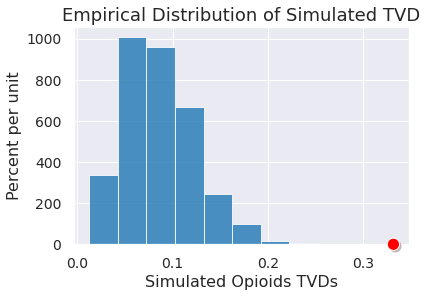

In [119]:
plot = Table().with_column("Simulated Opioids TVDs", simulated_opioids_statistics).hist()
plot.dot(observed_opioid_test_statistic)
plot.set_title("Empirical Distribution of Simulated TVD")

In [120]:
opioids_p_value = empirical_pvalue(simulated_opioids_statistics, observed_opioid_test_statistic)
opioids_p_value

0.0

<b>Conclusion:</b><br>
Using a p_value cut-off of 0.05, we reject the null hypothesis because the 0.0 is less than 0.05. This implies that the disproportionate deaths is due to other factors such as lack of treatment options for opioid use disorder in the black community and not randomness.

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 8. * Additional work


Use the cells below to add any additional work that supports exploring your data or answering quantitative questions. 

**Mastery and creativity.** A truly masterful data science project will go above and beyond the minimum requirements and creatively incorporate the concepts we have learned and practiced in this class. Feel free to go beyond the scope of what we have learned in this class if you have completed all other requirements.

In [195]:
def plot_death_rate(race, opioid):
    stack_opioids = opioids_original.stack('Year')
    new = stack_opioids.where('column', are.containing(opioid)).where('column', are.containing(race))
    return new.plot('Year', 'value').set_ylabel('Rate')

In [196]:
interact(plot_death_rate, race=Choice(make_array('White','Asian','Black','Native','Hispanic')), opioid=Choice(make_array('Any','Prescription','Synthetic','Cocaine','Heroin')))
#Not all races have data for all types of opioids!

interactive(children=(Dropdown(description='race', options=('White', 'Asian', 'Black', 'Native', 'Hispanic'), …

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 7. Ethics


Discuss (in full English sentences) at least one possible ethical consideration of using the dataset or doing analysis of the dataset (e.g., the potential harms of using the data from a Consequentialist or Deontologist perspective).

Using a deontological lens, there would be a responsibility for those using this dataset to use it with careful consideration of how it will impact/frame populations considered in the study. This includes having proper intentions of how findings are framed, making sure results are not sensationalized for a particular motive, and directing the results of the study towards groups that can help recitfy the disproportionality. Additionally, results should not be used as evidence to harm or justify harm of a given population; they should only be used to understand where races have been differently affected and how we can help them. Finally, it is important to present this study cautiously as it entails sensitive data such as the death rates of a specific population, from a specifc drug, in a specifc year, which may trigger individuals and families who may have lost a family member to this crisis.

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 8. Conclusions


Describe (in full English sentences) what has been learned and address the original quantitative questions.

By analyzing this data set, we have uncovered that death rate is positively correlated with year and consistent across identities, indicating that the opioid epidemic is conintuing to ravage our nation despite long-term recognition of the issue and attempts to stop it. Also, we found that different communities have been disproportinately affected by the opioid epidemic using death rate as a proxy of this. Specifically, our hypothesis test showed that the black community had death rates that were significantly different to their proportion of the populatuion, indicating that they have been disproportionately affected by the opioid epidemic.

This study was performed by Jackson Cook, Gabby Brown, and Jerry Hensure Lewouo Nizegha. Many thanks to Professor Freund for all of his help and such a fun class!!

# You're Done!

**Important submission information:** Follow these steps to submit your work:
* Choose **Save Notebook** from the **File** menu.
* **Run the final cell** and click the link below to download the zip file. 

Once you have downloaded that file, go to [Gradescope](https://www.gradescope.com/) and submit the zip file to the corresponding assignment. The name of this assignment is "Final Project". **Be sure your work is saved before running the last cell!**

In [205]:
# Save your notebook first, then run this cell to export your submission.
import glob 
grader.export(pdf=False,files=glob.glob("*.csv") + glob.glob("*.ipynb") + glob.glob("*.py"))

Output()